In [1]:
import json
import numpy as np
import rich

In [16]:
with open("taskeval_actual_movement_coop_with_actual_move.json", 'r') as f:
    with_actual = json.load(f)
    
with open("taskeval_llama_dialogue_movement_coop_with_actual.json", 'r') as f:
    llama_with_actual = json.load(f)

In [17]:
countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']
def get_score_with_env(countries, prediction):
    # The score is the average of the two countries' scores
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

In [18]:
with_actual_score = get_score_dict_from_dialogue(with_actual)
llama_with_actual_score = get_score_dict_from_dialogue(llama_with_actual)
high_actual_movement = [score for score in with_actual_score if score['scores'] >= 0.1]
high_actual_movement

[{'env': '01JBDMK2DHZ67BV0EVJGK13E8Z', 'scores': 0.19779285788536072},
 {'env': '01JBDMK12CAB7SVDTEB55MAR4V', 'scores': 0.16259623691439629},
 {'env': '01JBDMK0QSFXSTCHT4BQHZ56C7', 'scores': 0.10819064639508724},
 {'env': '01JBDMK1XSF38TSJ813R182E1S', 'scores': 0.1415375955402851},
 {'env': '01JBDMK17YB39HV72VRDCFNM7X', 'scores': 0.1405390240252018},
 {'env': '01JBDMK0SS526CVGNS8DTXD6K6', 'scores': 0.126529760658741},
 {'env': '01JBDMK27T1Y9303XVZDB27R4W', 'scores': 0.1774552809074521},
 {'env': '01JBDMK27WJVFGK8SSWGMG93CM', 'scores': 0.10775651689618826},
 {'env': '01JBDMK2336X5YF6R1VAEP64MC', 'scores': 0.1706826575100422},
 {'env': '01JBDMK1VXH11P04TM8V4ZY54Z', 'scores': 0.23703179322183132},
 {'env': '01JBDMK0X5A3QE57DWGM7HNMPH', 'scores': 0.2915705256164074},
 {'env': '01JBDMK17SZQQ3FG5CACVDSYE5', 'scores': 0.10067855566740036},
 {'env': '01JBDMK1TBHKS824WG61M27YQJ', 'scores': 0.17362235393375158},
 {'env': '01JBDMK1KFJMZNHHZD37RJEEQQ', 'scores': 0.19859473407268524},
 {'env': '01J

In [19]:
def caculate_score_different_via_env(llama_score, actual_score):
    actual_score_dict = {item['env']: item['scores'] for item in actual_score}
    differences = []
    for litem in llama_score:
        env_id = litem['env']
        if env_id in actual_score_dict:
            diff = {
                'env': env_id,
                'llama_score': litem['scores'],
                'actual_score': actual_score_dict[env_id],
                'score_diff': litem['scores'] - actual_score_dict[env_id]
            }
            differences.append(diff)
    differences.sort(key=lambda x: x['score_diff'], reverse=True)
    
    return differences

In [20]:
diff = caculate_score_different_via_env(llama_with_actual_score, high_actual_movement)
diff

[{'env': '01JBDMK1TBHKS824WG61M27YQJ',
  'llama_score': 0.26222324278205633,
  'actual_score': 0.17362235393375158,
  'score_diff': 0.08860088884830475},
 {'env': '01JBDMK2C9K275FEMPVBWWRDV7',
  'llama_score': 0.20249615609645844,
  'actual_score': 0.15193478763103485,
  'score_diff': 0.050561368465423584},
 {'env': '01JBDMK2DHZ67BV0EVJGK13E8Z',
  'llama_score': 0.2311714142560959,
  'actual_score': 0.19779285788536072,
  'score_diff': 0.03337855637073517},
 {'env': '01JBDMK27T1Y9303XVZDB27R4W',
  'llama_score': 0.20020776707679033,
  'actual_score': 0.1774552809074521,
  'score_diff': 0.022752486169338226},
 {'env': '01JBDMK17SZQQ3FG5CACVDSYE5',
  'llama_score': 0.10625774413347244,
  'actual_score': 0.10067855566740036,
  'score_diff': 0.0055791884660720825},
 {'env': '01JBDMK0SS526CVGNS8DTXD6K6',
  'llama_score': 0.12833429127931595,
  'actual_score': 0.126529760658741,
  'score_diff': 0.0018045306205749512},
 {'env': '01JBDMK1VXH11P04TM8V4ZY54Z',
  'llama_score': 0.2370317932218313

In [21]:
high_actual_movement

[{'env': '01JBDMK2DHZ67BV0EVJGK13E8Z', 'scores': 0.19779285788536072},
 {'env': '01JBDMK12CAB7SVDTEB55MAR4V', 'scores': 0.16259623691439629},
 {'env': '01JBDMK0QSFXSTCHT4BQHZ56C7', 'scores': 0.10819064639508724},
 {'env': '01JBDMK1XSF38TSJ813R182E1S', 'scores': 0.1415375955402851},
 {'env': '01JBDMK17YB39HV72VRDCFNM7X', 'scores': 0.1405390240252018},
 {'env': '01JBDMK0SS526CVGNS8DTXD6K6', 'scores': 0.126529760658741},
 {'env': '01JBDMK27T1Y9303XVZDB27R4W', 'scores': 0.1774552809074521},
 {'env': '01JBDMK27WJVFGK8SSWGMG93CM', 'scores': 0.10775651689618826},
 {'env': '01JBDMK2336X5YF6R1VAEP64MC', 'scores': 0.1706826575100422},
 {'env': '01JBDMK1VXH11P04TM8V4ZY54Z', 'scores': 0.23703179322183132},
 {'env': '01JBDMK0X5A3QE57DWGM7HNMPH', 'scores': 0.2915705256164074},
 {'env': '01JBDMK17SZQQ3FG5CACVDSYE5', 'scores': 0.10067855566740036},
 {'env': '01JBDMK1TBHKS824WG61M27YQJ', 'scores': 0.17362235393375158},
 {'env': '01JBDMK1KFJMZNHHZD37RJEEQQ', 'scores': 0.19859473407268524},
 {'env': '01J

/tmp/ipykernel_20533/2060773756.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='High Acutal Movement')
/tmp/ipykernel_20533/2060773756.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')


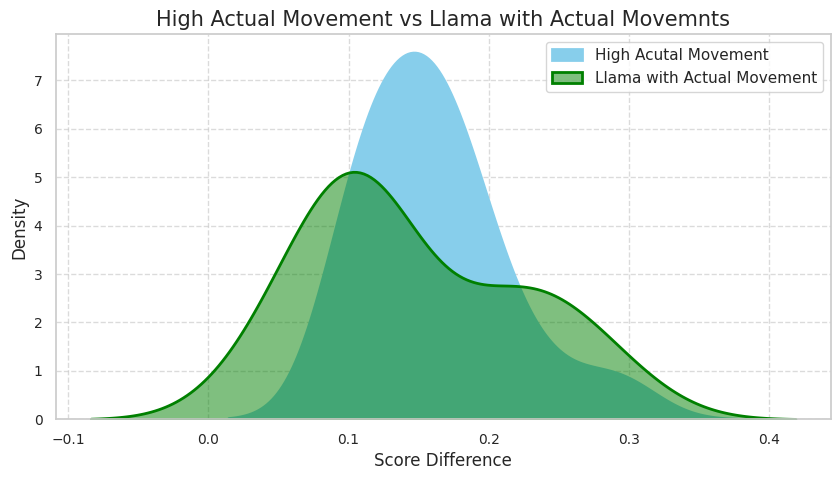

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
# data1 = [d['scores'] for d in human_few_shot_score_dict if d['scores'] >= 0.06]
data1 = [d['scores'] for d in high_actual_movement]
data2 = [d['scores'] for d in llama_with_actual_score]
# data3 = [d['scores'] for d in nactual_wcf_score if d['scores'] >= 0.00]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
# sns.kdeplot(data3, shade=True, color='purple', alpha=0.8, linewidth=2, label='Actual Dialogue with plausible')
sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='High Acutal Movement')
sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    # plt.axvline(x=score1, color='red', linestyle='--', label=f'with plausible - {percentile}th: {score1:.2f}')
    score2 = np.percentile(data2, percentile)
    # plt.axvline(x=score2, color='purple', linestyle='--', label=f'without plausible - {percentile}th: {score2:.2f}')

plt.title('High Actual Movement vs Llama with Actual Movemnts', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


/tmp/ipykernel_20533/3022167057.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='Llama - Actual Score')


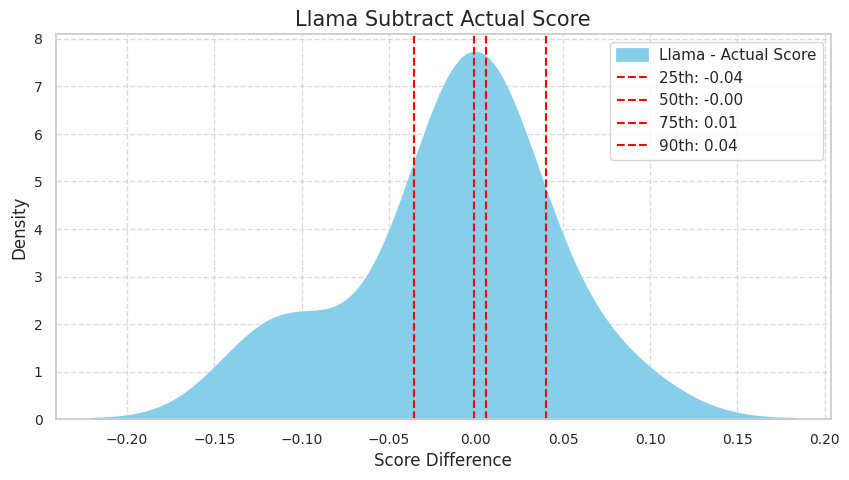

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data1 = [d['score_diff'] for d in diff]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
# sns.kdeplot(data3, shade=True, color='purple', alpha=0.8, linewidth=2, label='Actual Dialogue with plausible')
sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='Llama - Actual Score')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    plt.axvline(x=score1, color='red', linestyle='--', label=f'{percentile}th: {score1:.2f}')
plt.title('Llama Subtract Actual Score', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [24]:
llama_better = [d['env'] for d in llama_with_actual_score if d['scores'] >= 0.1]
llama_worse = [d['env'] for d in llama_with_actual_score if d['scores'] < 0.1]
len(llama_better), len(llama_worse), print(llama_better, llama_worse)

['01JBDMK2DHZ67BV0EVJGK13E8Z', '01JBDMK1TBHKS824WG61M27YQJ', '01JBDMK27WJVFGK8SSWGMG93CM', '01JBDMK17SZQQ3FG5CACVDSYE5', '01JBDMK12CAB7SVDTEB55MAR4V', '01JBDMK17YB39HV72VRDCFNM7X', '01JBDMK27T1Y9303XVZDB27R4W', '01JBDMK1VXH11P04TM8V4ZY54Z', '01JBDMK0SS526CVGNS8DTXD6K6', '01JBDMK2CMQ5NNDY6D01K1BQ1G', '01JBDMK0X5A3QE57DWGM7HNMPH', '01JBDMK2C9K275FEMPVBWWRDV7'] ['01JBDMK0QSFXSTCHT4BQHZ56C7', '01JBDMK1ZVFDTAWWR4GBJ7ZYDV', '01JBDMK2336X5YF6R1VAEP64MC', '01JBDMK1KFJMZNHHZD37RJEEQQ', '01JBDMK1XSF38TSJ813R182E1S']


(12, 5, None)

## Case Study

In [11]:
from sotopia.database import AgentProfile, EpisodeLog, EnvironmentProfile
llama_better_full = []
llama_worse_full = []
for l in llama_with_actual: 
    if l['env_uuid'] in llama_better:
        llama_better_full.append(l)
for l in llama_with_actual: 
    if l['env_uuid'] in llama_worse:
        llama_worse_full.append(l)
len(llama_better_full), len(llama_worse_full)

(12, 5)

In [12]:
clean_empty_llama_worse = [i for i in llama_worse_full if i['intent_dialogue'] != '']
len(clean_empty_llama_worse)

3

In [13]:
clean_empty_llama_better = [i for i in llama_better_full if i['intent_dialogue'] != '']
len(clean_empty_llama_better)

6

In [14]:
index = 3
rich.print(EnvironmentProfile.get(clean_empty_llama_better[index]['env_uuid']))
rich.print(clean_empty_llama_better[index]['intent_dialogue'])

EnvironmentProfile(
    pk='01JBDMK17YB39HV72VRDCFNM7X',
    codename='',
    phase_name='S1904M',
    game_id='38101',
    source='',
    scenario="Here is the previous dialogue, and the previous countries' centers and units between the two 
countries : Austria and Turkey: \nS1906M: \nDialogue Between Two Countries: \nTURKEY to AUSTRIA: So what do you 
think here? I should send Aegean to Ionian and Con to Aegean probably? Can you support Aegean to Ionian with 
Greece?  You can take Trieste back easily now. The only question is whether to let Italy take Venice, or try to 
keep France there. I think it's better to have Italy take it. France will want to keep it. In a year or so we can 
probably get you into Venice too.\r\nAUSTRIA to TURKEY: I should be able to support you through. I think you need 
to get towards the Wmed as quickly as possible as France is about to start bottling things up with that fleet build
in Marseilles. England will be dead soon with the FG working together.  We're both at a pretty critical juncture 
here. I recognize the fact you're surrounding several of my dots. I think it very likely you pick up STP though if 
you take Mos-liv and Sev-mos. Norway will inevitably get cut by Germany in the Fall, meaning STP is yours to take 
from Liv.  I'll have to make a decision on covering Rumania and/or Bulgaria this season and I can't really tell you
so as to discourage any stab. I'm sure you understand. :) I do think we've both got plenty of growth potential 
right now and in my experience, lack of growth potential should be the primary reason for a stab unless it's going 
to be a knockout blow. With me picking up Trieste back, there is a chance you could pick up Rumania AND Bulgaria 
off me, but going down one and having me turning around vs. you likely picking up STP and definitely getting Ionian
seems like a bad gamble. Hopefully you're in agreement.  What do you think?\r\nAUSTRIA to TURKEY: Ionian is 
yours.\r\nTURKEY to AUSTRIA: Hi,  Sorry about the slow response. I agree that you should cover one of Rum or Bul. I
kind of assumed you would. Even if you don't support me I might still get Ionian - it's just kind of a problem if I
don't. Anyway, I don't need to know what you're doing.  Once I get Ionian we can talk about the next best move. I 
might need to go to West Med, but we also need to finish off Italy. I don't want to get stalemated, but I also 
don't want him behind me. Thankfully, he probably is less interested in working with France now.  Anyway, you know 
my moves. I'm going Livonia/Moscow and to Ionian and Aegean. In the fall we might want to convoy an army, but we'll
see.\r\nCountries' Center in This Phase: \n{'AUSTRIA': ['BUD', 'VIE', 'SER', 'BUL', 'WAR', 'RUM', 'GRE'], 
'ENGLAND': ['EDI', 'LON', 'LVP', 'NWY', 'STP'], 'FRANCE': ['BRE', 'MAR', 'PAR', 'POR', 'SPA', 'VEN'], 'GERMANY': 
['BER', 'KIE', 'MUN', 'DEN', 'HOL', 'BEL'], 'ITALY': ['NAP', 'ROM', 'TRI'], 'RUSSIA': ['SWE'], 'TURKEY': ['ANK', 
'CON', 'SMY', 'SEV', 'TUN', 'MOS']}\nCountries' Units in This Phase: \n{'AUSTRIA': ['A WAR', 'A BUD', 'A VIE', 'A 
BOH', 'A TYR', 'A SER', 'F GRE'], 'ENGLAND': ['F NTH', 'F STP/NC', 'F NAO', 'F NWY', 'A LON'], 'FRANCE': ['A BUR', 
'A PIC', 'F MAO', 'F ENG', 'A VEN', 'F MAR'], 'GERMANY': ['A MUN', 'A HOL', 'A BEL', 'F SKA', 'A DEN', 'F BAL'], 
'ITALY': ['F ADR', 'A TRI', 'F ION'], 'RUSSIA': ['A SIL'], 'TURKEY': ['A MOS', 'A SMY', 'F TUN', 'A SEV', 'F AEG', 
'F CON']}\nCountires' Order in This Phase: \n{'AUSTRIA': ['A VIE - TRI', 'A BUD S A VIE - TRI', 'A WAR S A BOH - 
GAL', 'A BOH - GAL', 'A SER - ALB', 'F GRE - ALB', 'A TYR - VEN'], 'ENGLAND': ['A LON - HOL VIA', 'F NAO - IRI', 'F
NTH C A LON - HOL', 'F STP/NC - NWY', 'F NWY - SWE'], 'FRANCE': ['F ENG S A PIC - BEL', 'A PIC - BEL', 'A VEN - 
PIE', 'F MAR - LYO', 'A BUR S A PIC - BEL', 'F MAO H'], 'GERMANY': ['F BAL S F SKA - SWE', 'A DEN - KIE', 'A HOL S 
A BEL', 'A MUN H', 'A BEL S A HOL', 'F SKA - SWE'], 'ITALY': ['F ADR S A TRI - VEN', 'F ION - NAP', '

0 AUSTRIA -> TURKEY: Hi, thanks for supporting me into Ionian. I'm moving my fleet to Aegean and supporting your 
move there. What's your plan for the next turn? Do you think we should focus on finishing off Italy or moving 
towards the West Med?
1 TURKEY -> AUSTRIA: Hi Austria, thanks for the support. I think we should focus on finishing off Italy for now, 
especially since France seems to be getting a bit too strong. What do you think about supporting my army in 
Sevastopol to Moscow, and then we can discuss our next moves from there?
2 AUSTRIA -> TURKEY: That sounds like a good plan. Supporting your army in Sevastopol to Moscow would be beneficial
for both of us. I'm planning to move my army in Ukraine to Moscow as well, which would give us a strong presence in
the region. What do you think about supporting my fleet in Bulgaria to Aegean, and then we can convoy an army to 
Greece in the fall?
3 TURKEY -> AUSTRIA: That sounds like a solid plan. I'll support your fleet in Bulgaria to Aegean, and then we can 
convoy an army to Greece in the fall. Do you think we should also support each other's armies in Sevastopol and 
Ukraine to Moscow?
4 AUSTRIA -> TURKEY: Yes, that sounds like a good plan. I'll support your army in Sevastopol to Moscow, and then we
can discuss our next moves from there. Do you think we should also consider supporting each other's armies in 
Rumania and Bulgaria to prevent any potential stabs?
5 TURKEY -> AUSTRIA: I think that's a good plan, supporting each other in Rumania and Bulgaria can help prevent any
potential stabs. What do you think about supporting my army in Ankara to Armenia, and then we can discuss our next 
moves from there?
6 AUSTRIA -> TURKEY: Yes, supporting your army in Ankara to Armenia sounds like a good plan. I think we should also
consider supporting each other's fleets in the Aegean to prevent any potential conflicts. What do you think about 
supporting my fleet in Bulgaria to Aegean, and then we can discuss our next moves from there?
7 TURKEY -> AUSTRIA: I think we're making good progress, Austria. Supporting each other in Rumania and Bulgaria 
will definitely help prevent any potential stabs. I'm thinking of moving my army in Rumania to Sevastopol, what do 
you think about supporting that move? We can discuss our next steps from there.
8 AUSTRIA -> TURKEY: That sounds like a good plan. I think we should also consider supporting each other's fleets 
in the Aegean to prevent any potential conflicts. What do you think about supporting my fleet in Bulgaria to 
Aegean, and then we can discuss our next moves from there?
9 TURKEY -> AUSTRIA: I think we're making good progress, Austria. Supporting each other in Rumania and Bulgaria 
will definitely help prevent any potential stabs. I'm thinking of moving my army in Rumania to Sevastopol, what do 
you think about supporting that move? We can discuss our next steps from there.
10 AUSTRIA -> TURKEY: I think we're on the same page, Turkey. Supporting each other in Rumania and Bulgaria will 
definitely help prevent any potential stabs. I'm planning to move my army in Trieste to Tyrol, my fleet in Bulgaria
to Aegean, and my army in Serbia to Rumania. What do you think about supporting my army in Ukraine to Moscow, and 
then we can discuss our next moves from there?
11 TURKEY -> AUSTRIA: I think we're making good progress, Austria. Supporting each other in Rumania and Bulgaria 
will definitely help prevent any potential stabs. I'm thinking of moving my army in Ankara to Armenia, what do you 
think about supporting that move? We can discuss our next steps from there.
12 AUSTRIA -> TURKEY: I think we're making good progress, Turkey. Supporting each other in Rumania and Bulgaria 
will definitely help prevent any potential stabs. I'm planning to move my army in Trieste to Tyrol, my fleet in 
Bulgaria to Aegean, and my army in Serbia to Rumania. What do you think about supporting my army in Ukraine to 
Moscow, and then we can discuss our next moves fro

In [15]:
# For prompt use
print(EnvironmentProfile.get(clean_empty_llama_better[index]['env_uuid']).agent_goals)
print(clean_empty_llama_better[index]['intent_dialogue'])

["Negotiate with Turkey so that it will play moves that are beneficial to your board position, either this turn or in future turns. Discuss specific army movements that can be made this turn for your benefit if any exist. Here are all the movements you plan to do for this turn: ['A TRI - TYR', 'F BUL/SC - AEG', 'A SER - RUM', 'A UKR - MOS', 'A BUD - GAL']. Imitate the style and content of previous dialogues between the two countries, conducting a multi-round conversation. Make sure your own dialogue between Turkey is within 5 turns.", "Negotiate with Austria so that it will play moves that are beneficial to your board position, either this turn or in future turns. Discuss specific army movements that can be made this turn for your benefit if any exist. Here are all the movements you plan to do for this turn: ['A ANK - ARM', 'F GRE S F BUL/SC - AEG', 'A RUM - SEV', 'F BLA S A RUM - SEV', 'A SMY - ARM']. Imitate the style and content of previous dialogues between the two countries, condu